In [646]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model


# store dataset in a variable
dataSens = 'dataSensors.csv'
# create dataframe & delete all NaN value
df = pd.read_csv(dataSens,sep=";") # .fillna('')

#Activity recognition implementation
# convert status_windows in opened || closed
df.loc[df['status_windows'] == "ON",  'status_windows'] = "opened"
df.loc[df['status_windows'] == "OFF", 'status_windows'] = "closed"

#take entire string, extract the seconds  and put new value in the 'time' column
df['time'] = [int(x[13:]) for x in df['time']]
#filter all NaN value
df_NoNan = df.dropna()

#new dataframe without time
df1 = df_NoNan[['volt','time','status_windows',]].reset_index()
df2 = df1[['volt','time','status_windows']]
#get total duration of status windows  
df2['total_seconds'] = abs(df2['time'] - df2['time'].shift(-1))

# print(df2)
#statical analysis
df2['status_windows'].value_counts()


# print(df2.describe())

#scatter plot
# df2.plot(kind = 'scatter', 
#                  x = 'total_seconds', 
#                  y = 'volt') 
# plt.grid()
# plt.show()

#seaborn scatterplot

# sns.set(style = 'whitegrid')
# sns.FacetGrid(df2, hue = 'status_windows', height = 6) \
#  .map(plt.scatter, 'total_seconds', 'volt') \
#  .add_legend()
# plt.show()

  
# plotting correlation heatmap
# dataplot=sns.heatmap(df2.corr())
# displaying heatmap
# plt.show()

# linear regression case Opened and closed
# sns.regplot(x = "total_seconds",
#             y = "volt", 
#             ci = None,
#             data = df2)

#linear regression for Closed & Opened cases
#filter data set with only 
# df3 = df2.loc[df2['status_windows']=='closed'][:-1]
# sns.regplot(x = "total_seconds",
#             y = "volt", 
#             ci = None,
#             data = df3)

# print(df3)

#random forest
#define series
X_df = df2['volt'][:-1].values
X_reshape = X_df.reshape((-1,1))
X = X_reshape

Y_df = df2['total_seconds'][:-1].values
Y_reshape = Y_df.reshape((-1,1))
y = Y_reshape


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2[:-1].drop('status_windows', 1),
                                                    df2['status_windows'][:-1],
                                                    test_size = .4, random_state=1000)

# creation model
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)
# Make predictions for the test set
estimator = model.estimators_[1]
# features = [i for i in X_train]
# y_train_str = y_train.astype('str')
# # condition 
# y_train_str[y_train_str == 'opened'] = y_train_str+': Volt value decreasing'
# y_train_str[y_train_str == 'closed'] = y_train_str+':  Volt value increasing'

y_pred_test = model.predict(X_test)

# View accuracy score
# accuracy_score(y_test, y_pred_test)

# View the classification report for test data and predictions
# print(classification_report(y_test, y_pred_test))

# View the classification report for test data and predictions
# print(classification_report(y_test, y_pred_test))

#AUC score 
# from sklearn.metrics import roc_auc_score
# roc_auc_score(X_train,y_test )


# plot Tree 
# y_train_str = y_train_str.values
# export_graphviz(estimator, out_file='treeTestNew.dot', 
#                 feature_names = features,
#                 class_names = y_train_str, 
#                 proportion = True, 
#                 label='root',
#                 precision = 2, filled = True



# View the classification report for test data and predictions
# print(classification_report(y_test))

#score importance values assignment 
# x = df2[:-1].drop(columns = ['total_seconds'])
# y = df2['total_seconds'][:-1]

# model = linear_model.LinearRegression()

# model.fit(x,y)

# #prediction

# predictions = model.predict(x)

# actuals = y.values

# mae =0

# for i in range(0,len(predictions)):
#     prediction = predictions[i]
#     actual = actuals[i]
#     abs_error = prediction - actual
#     mae = mae + abs_error

# mae = mae/len(predictions)

# print("mae: ",mae)
# print("mean: ",actuals.mean())
# print("mae mean ratio: ",100*mae/actuals.mean(),'%') 

# #equation

# intercept = model.intercept_
# print('model :',model)

# coefficients = model.coef_


# print("y =",intercept,"+",end="")

# for i in range(0,len(coefficient)):
#         print(coefficient[i], "X",i," +",end="")
        
# print(" E")

# features = pd.DataFrame(coefficients,x.columns,columns=["coefficients"])

# features.coefficients = features.coefficients.abs()

# stdevs = []

# for i in x.columns:
#     stdev = df2[i].std()
#     print(i,"->",stdev)
#     stdevs.append(stdev)

# stdevs

# features["std"] = np.array(stdevs).reshape(-1,1)
# features["importance"] = features["std"]*features["coefficients"]
# features["importance_normalized"] = 100*features["importance"] / features["importance"].max()

# features

# plt.barh(features.index,features.importance_normalized)









Result process: 
volt -> [105, 221, 297, 305, 202, 295, 342, 348, 324, 320, 275, 598, 527, 520, 335, 484, 454, 590, 290, 589, 250, 318, 377, 564, 220, 438, 331, 476, 425, 600, 549, 457, 587, 291, 296, 355, 220, 366, 220, 571, 516, 369, 420, 364]
Status_Windows: Opened -> ['closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed']
Status_Windows: Closed -> ['closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed', 'closed']


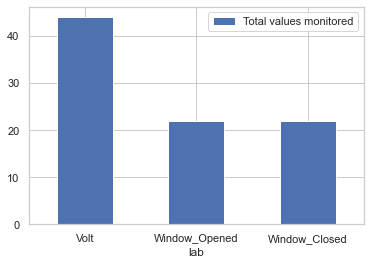

In [729]:
#define new dataframe
df_new=df2
#select first column
first_column = df_new.iloc[:, 0]
tot_volt_monitored = len(first_column.index)
#select third column
third_column = df_new.iloc[:, 2]
tot_status_windows = len(third_column.index)
opened = closed = third_column[lambda x: x!="opened"]

volt = first_column.tolist()
df_plot = pd.DataFrame({'lab':['Volt', 'Window_Opened', 'Window_Closed'],
                        'Total values monitored':[len(volt),len(opened),len(closed)]})

df_plot.plot.bar(x='lab', y='Total values monitored', rot=0)
print("Result process: ")
print("volt ->",volt)
print("Status_Windows: Opened ->", opened.tolist())
print("Status_Windows: Closed ->", closed.tolist())




